<a href="https://colab.research.google.com/github/supsi-dacd-isaac/TeachDecisionMakingUncertainty/blob/main/Visualize_Gfun_Ifun_FailureDomain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Viualize three simple reliability examples:

1. A single linear limit state function:

  * Visualize $g(x) = a_0 + a_1x$, indicator function $I(x)$
  

2. A single non-linear limit state function:

  * $g(x) = a_0 + a_1x_1^2 + a_2(x_1 + x_2)^2$
  * 2D failure domain and multivariate correlated gaussian $f(x_1,x_2)$



3. Multiple non-linear limit state functions:

  *  $g_1(x) = a_0 + a_1x_1^2 + a_2(x_1 + x_2)^2$
  *  $g_2(x) = g_{dof,sys}(x)$
  *  $w(x) = \min_i g_i(x)$

* 2D failure domain for $g_1(x)$,  $g_2(x)$,  worst case $w(x)$



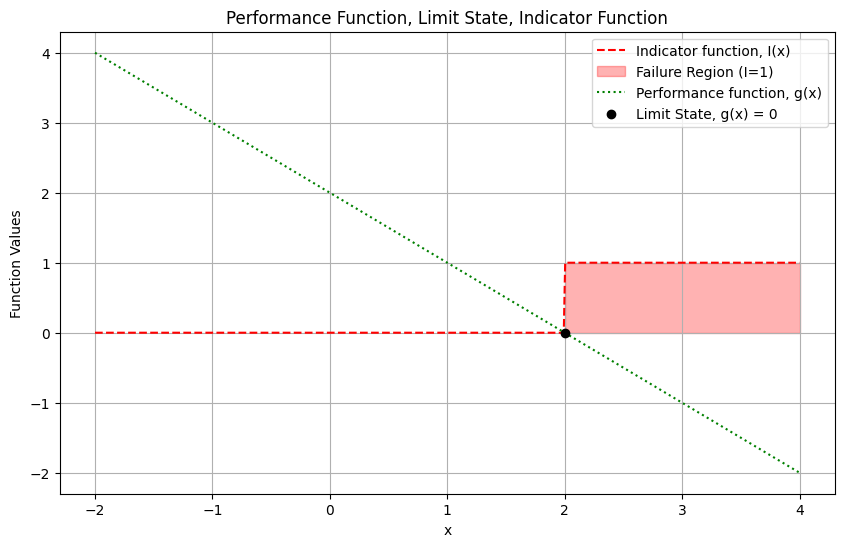

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

# Parameters for the limit state function g(x)
a0, a1 = 2,  -1
g_fun = lambda x: a0 + a1 * x # Calculate g(x)
I_fun = lambda x: np.where(g_fun(x) <= 0, 1, 0)  # Indicator function I(x)
lsf =  -a0/a1

# visualize
x_2plot = np.linspace(-2, 4, 500)  # Range of x values for plotting

# Create the plot
g_values = g_fun(x_2plot)
I_values = I_fun(x_2plot)

# Get values and create the plot
plt.figure(figsize=(10, 6))

# Plot the indicator function I(x) and fill region (where I(x) = 1)
plt.plot(x_2plot, I_values, color='red', linestyle='--', label='Indicator function, I(x)')
plt.fill_between(x_2plot, I_values, alpha=0.3, color='red', where=(I_values == 1), label='Failure Region (I=1)')

# Plot the performance function g(x)
plt.plot(x_2plot, g_values, ':g', label='Performance function, g(x)')

# Mark the limit state g(x) = 0
plt.scatter(lsf, 0, color='black', label='Limit State, g(x) = 0', zorder=3)

# Labels and legend
plt.xlabel('x')
plt.ylabel('Function Values')
plt.title('Performance Function, Limit State, Indicator Function')
plt.legend()
plt.grid(True)
plt.show()

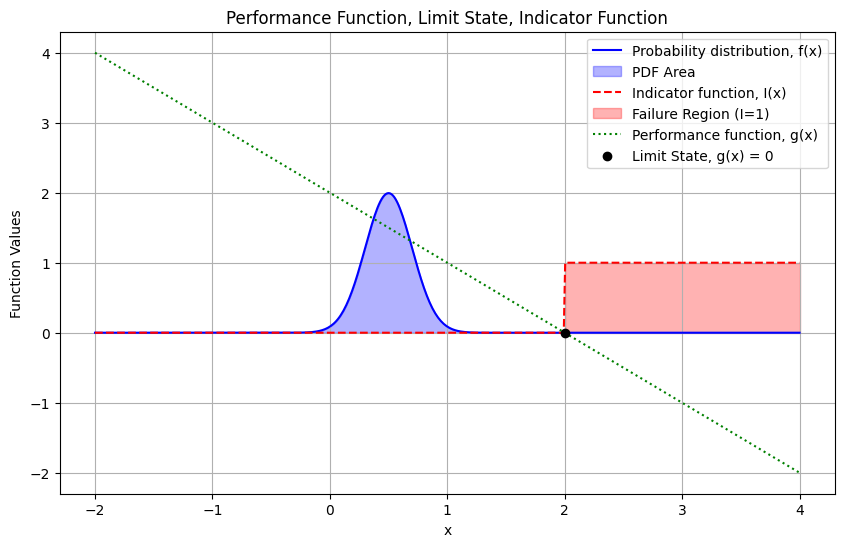

In [191]:
# Normal distribution (PDF)
mean, std_dev = 0.5, 0.2
pdf_fun =  lambda x: norm.pdf(x, loc=mean, scale=std_dev)
pdf_values = pdf_fun(x_2plot)

# Get values and create the plot
plt.figure(figsize=(10, 6))

# Plot the probability distribution (PDF) and fill
plt.plot(x_2plot, pdf_values, color='blue', label='Probability distribution, f(x)')
plt.fill_between(x_2plot, pdf_values, alpha=0.3, color='blue', label='PDF Area')

# Plot the indicator function I(x) and fill region (where I(x) = 1)
plt.plot(x_2plot, I_values, color='red', linestyle='--', label='Indicator function, I(x)')
plt.fill_between(x_2plot, I_values, alpha=0.3, color='red', where=(I_values == 1), label='Failure Region (I=1)')

# Plot the performance function g(x)
plt.plot(x_2plot, g_values, ':g', label='Performance function, g(x)')

# Mark the limit state g(x) = 0
plt.scatter(lsf, 0, color='black', label='Limit State, g(x) = 0', zorder=3)

# Labels and legend
plt.xlabel('x')
plt.ylabel('Function Values')
plt.title('Performance Function, Limit State, Indicator Function')
plt.legend()
plt.grid(True)
plt.show()

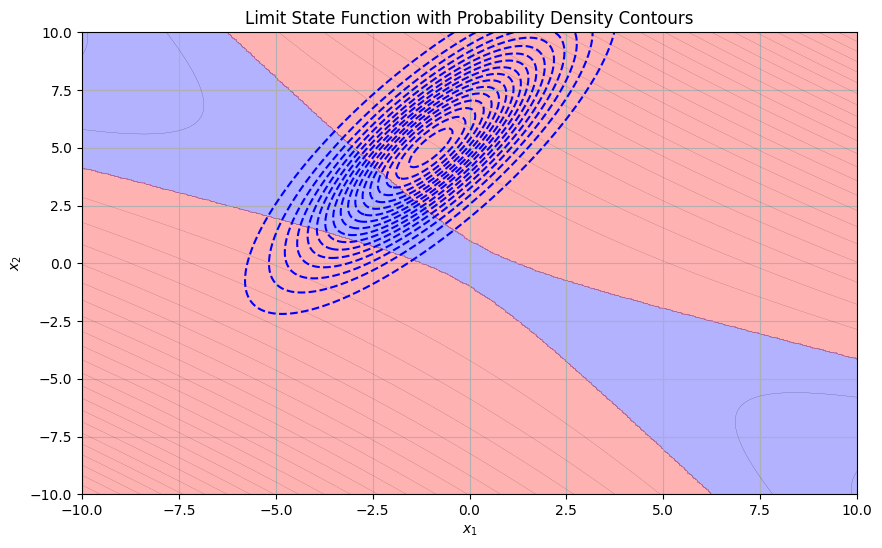

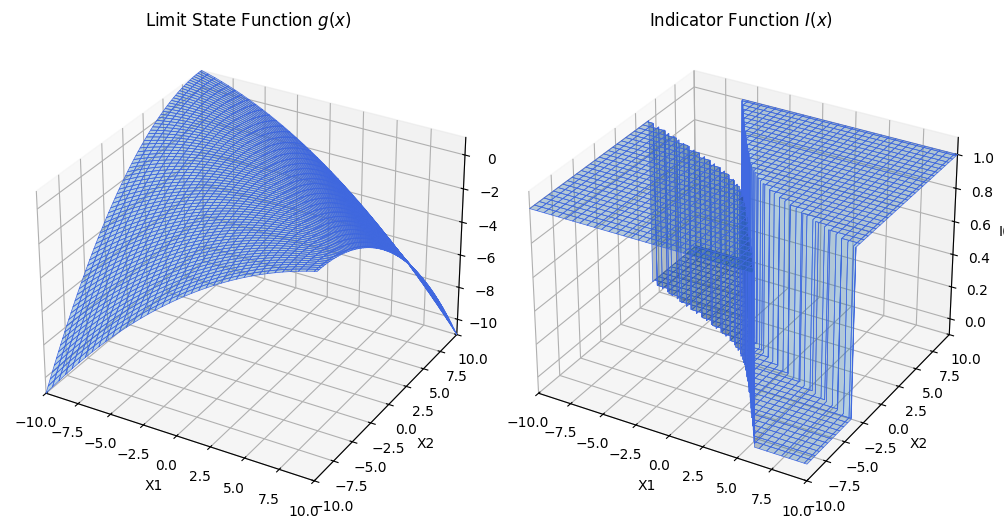

In [220]:
from scipy.stats import multivariate_normal

# Parameters for the limit state function g(x)
a0, a1, a2 = 3, 1, -3
g_fun1 = lambda x1, x2: a0 + a1 * x1**2 + a2 * (x2 + x1)**2  # Limit state function
I_fun1 = lambda x1, x2: np.where(g_fun1(x1, x2) <= 0, 1, 0)  # Indicator function

# Define probability distribution
mean1, mean2 = -1, 5
std_dev1, std_dev2 = 2, 3
rho = 0.8
cov_matrix = [[std_dev1**2, rho * std_dev1 * std_dev2],
              [rho * std_dev1 * std_dev2, std_dev2**2]]

MVRandom = multivariate_normal(mean=[mean1, mean2], cov=cov_matrix)

# Create a meshgrid for x1 and x2
x1 = np.linspace(-10, 10, 300)
x2 = np.linspace(-10, 10, 300)
X1, X2 = np.meshgrid(x1, x2)

# Evaluate g(x) and I(x) on the grid
G1 = g_fun1(X1, X2)
I1 = I_fun1(X1, X2)

# Compute the multivariate probability density function
pos = np.dstack((X1, X2))  # Stack X1 and X2 into shape (300,300,2)
P = MVRandom.pdf(pos)

# Plot
plt.figure(figsize=(10, 6))

# **Fill g(x) regions with only two colors (Safe: Blue, Failure: Red)**
plt.contourf(X1, X2, I1, levels=[-0.5, 0.5, 1.5], colors=['blue', 'red'], alpha=0.3)

# **Add multiple contour lines for g(x)**
plt.contour(X1, X2, G1, levels=25, colors='k', linewidths=0.1)

# **Add contour lines for probability density function P(x)**
plt.contour(X1, X2, P, levels=20, colors='b', linestyles='dashed')

# Labels and legend
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.title('Limit State Function with Probability Density Contours')
plt.show()


from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

# Plot the 3D surface
# Create figure and 3D subplots
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(10, 10))

# **Plot g(x) Surface**
ax[0].plot_surface(X1, X2, G1 / 100, edgecolor='royalblue', lw=0.5, rstride=4, cstride=8, alpha=0.3)
ax[0].set(xlim=(-10, 10), ylim=(-10, 10), zlim=(np.min(G1) / 100, np.max(G1) / 100),
          xlabel='X1', ylabel='X2', zlabel='g(x)')
ax[0].set_title('Limit State Function $g(x)$')

# **Plot Indicator Function Surface**
ax[1].plot_surface(X1, X2, I1, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)
ax[1].set(xlim=(-10, 10), ylim=(-10, 10), zlim=(-0.1, 1.1),  # Adjust zlim for binary values
          xlabel='X1', ylabel='X2', zlabel='I(x)')
ax[1].set_title('Indicator Function $I(x)$')

plt.tight_layout()
plt.show()

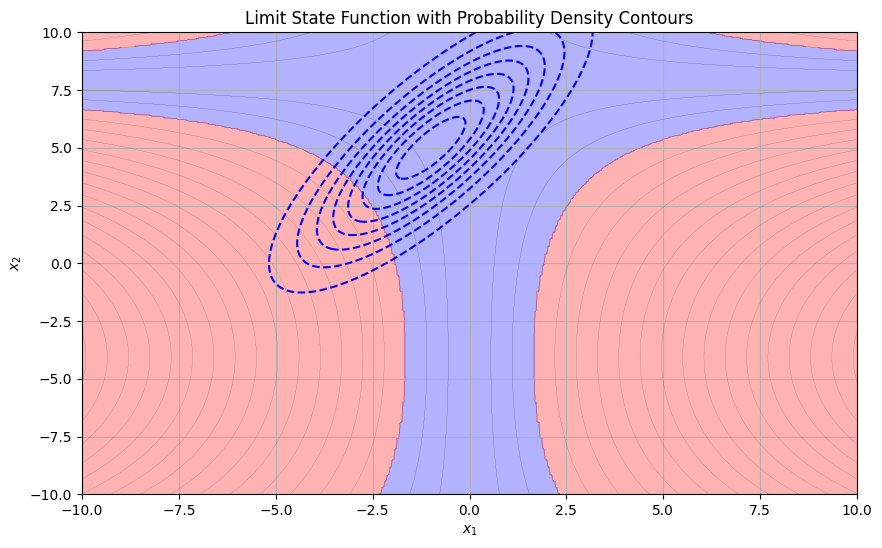

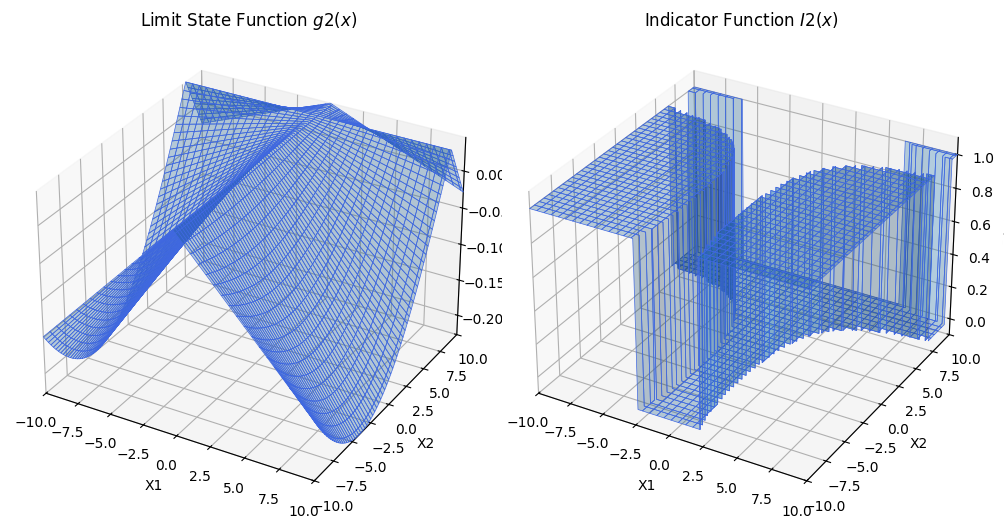

In [221]:
def gSDOF(r, F1, t1, k1, k2, m):
    """
    Computes the limit state function gSDOF.
    A non-linear undamped single-degree-of-freedom (SDOF) oscillator

    See Echard et al., 2011, 2013; Schueremans and Van Gemert, 2005 for more details.

    Input parameters and variables:
    r  : float  - Max displacement at which the secondary spring yields
    F1 : float  - Force amplitude
    t1 : float  - Time parameter (duration of the loading)
    k1 : float  - Stiffness parameter 1
    k2 : float  - Stiffness parameter 2
    m  : float  - Mass

    Returns:
    g : float - Computed gSDOF value

    Failure is defined as gSDOF ≤ 0  -->
    This happens if if 3*r (3 times the MAX displaement) is exeeded for F1 and t1
    """

    omega0 = np.sqrt((k1 + k2) / m)  # natural frequency of the oscillator
    variable_displacement_Ft  = np.abs((2 * F1 / (m * omega0**2)) * np.sin(omega0 * t1 / 2))
    g = 3 * r - variable_displacement_Ft
    return g


def g_fun2(x1,x2):
    m = 1
    k1 = 1
    k2 = 0.1
    r = 1.5
    F1 = x1 * 1.5
    t1 = 10 + x2/4
    g_val = gSDOF(r, F1, t1, k1, k2, m)
    return g_val


# Parameters for the limit state function g(x)
I_fun2 = lambda x1, x2: np.where(g_fun2(x1, x2) <= 0, 1, 0)  # Indicator function

# Evaluate g(x) and I(x) on the grid
G2 = g_fun2(X1, X2)
I2 = I_fun2(X1, X2)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(X1, X2, I2, levels=[-0.5, 0.5, 1.5], colors=['blue', 'red'], alpha=0.3)
plt.contour(X1, X2, G2, levels=25, colors='k', linewidths=0.1)
plt.contour(X1, X2, P, levels=10, colors='b', linestyles='dashed')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.title('Limit State Function with Probability Density Contours')
plt.show()

# Plot the 3D surface
# Create figure and 3D subplots
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(10, 10))

# **Plot g(x) Surface**
ax[0].plot_surface(X1, X2, G2 / 100, edgecolor='royalblue', lw=0.5, rstride=4, cstride=8, alpha=0.3)
ax[0].set(xlim=(-10, 10), ylim=(-10, 10), zlim=(np.min(G2) / 100, np.max(G2) / 100),
          xlabel='X1', ylabel='X2', zlabel='g2(x)')
ax[0].set_title('Limit State Function $g2(x)$')

# **Plot Indicator Function Surface**
ax[1].plot_surface(X1, X2, I2, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)
ax[1].set(xlim=(-10, 10), ylim=(-10, 10), zlim=(-0.1, 1.1),  # Adjust zlim for binary values
          xlabel='X1', ylabel='X2', zlabel='I2(x)')
ax[1].set_title('Indicator Function $I2(x)$')

plt.tight_layout()
plt.show()

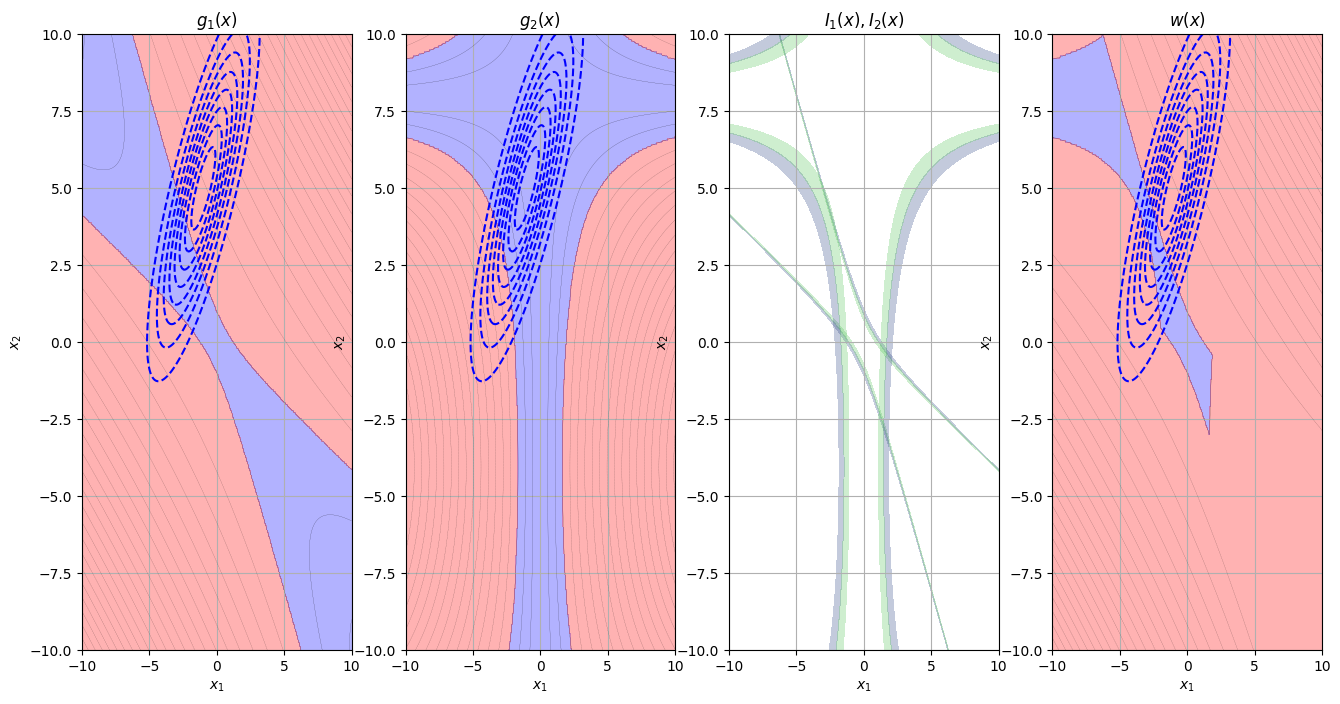

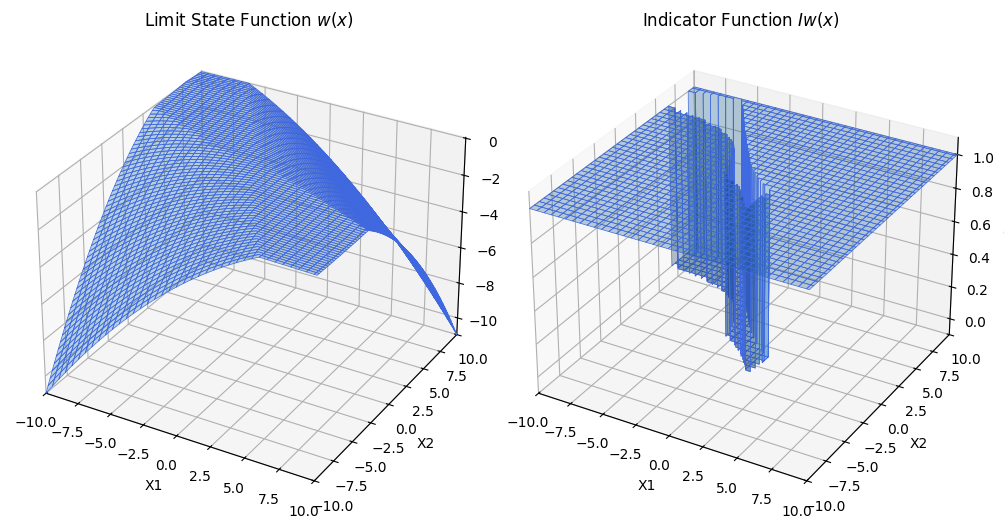

In [234]:
def worst_case_perf(x1,x2):
    g1 = g_fun1(x1,x2)
    g2 = g_fun2(x1,x2)
    return np.minimum(g1,g2)

# Parameters for the limit state function g(x)
I_fun_wc = lambda x1, x2: np.where(worst_case_perf(x1, x2) <= 0, 1, 0)  # Indicator function

# Evaluate g(x) and I(x) on the grid
W = worst_case_perf(X1, X2)
Iw = I_fun_wc(X1, X2)

# Plot
fig, axs = plt.subplots(1,4,figsize=(16, 8))

# Plot the 1st response  g1
axs[0].contourf(X1, X2, I1, levels=[-0.5, 0.5, 1.5], colors=['blue', 'red'], alpha=0.3)
axs[0].contour(X1, X2, G1, levels=25, colors='k', linewidths=0.1)
axs[0].contour(X1, X2, P, levels=10, colors='b', linestyles='dashed')
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].grid(True)
axs[0].set_title('$g_1(x)$')

# Plot the 2nd response  g2
axs[1].contourf(X1, X2, I2, levels=[-0.5, 0.5, 1.5], colors=['blue', 'red'], alpha=0.3)
axs[1].contour(X1, X2, G2, levels=25, colors='k', linewidths=0.1)
axs[1].contour(X1, X2, P, levels=10, colors='b', linestyles='dashed')
axs[1].set_xlabel('$x_1$')
axs[1].set_ylabel('$x_2$')
axs[1].grid(True)
axs[1].set_title('$g_2(x)$')

# Plot together
for G2p, I2p in zip([I1,I2], [G1,G2]):
  axs[2].contourf(X1, X2, I2p, levels=[-0.5, 0.5, 1.5], alpha=0.3)
  #axs[2].contour(X1, X2, G2p, levels=25, colors='k', linewidths=0.1)
axs[2].set_xlabel('$x_1$')
axs[2].set_ylabel('$x_2$')
axs[2].grid(True)
axs[2].set_title('$I_1(x), I_2(x)$')

# Plot combined worst case
axs[3].contourf(X1, X2, Iw, levels=[-0.5, 0.5, 1.5], colors=['blue', 'red'], alpha=0.3)
axs[3].contour(X1, X2, W, levels=25, colors='k', linewidths=0.1)
axs[3].contour(X1, X2, P, levels=10, colors='b', linestyles='dashed')
axs[3].set_xlabel('$x_1$')
axs[3].set_ylabel('$x_2$')
axs[3].grid(True)
axs[3].set_title('$w(x)$')
plt.show()


# Plot the 3D surface for the joint failure region and worst case performance function
# Create figure and 3D subplots
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(10, 10))

# **Plot g(x) Surface**
ax[0].plot_surface(X1, X2, W / 100, edgecolor='royalblue', lw=0.5, rstride=4, cstride=8, alpha=0.3)
ax[0].set(xlim=(-10, 10), ylim=(-10, 10), zlim=(np.min(W) / 100, np.max(W) / 100),
          xlabel='X1', ylabel='X2', zlabel='g(x)')
ax[0].set_title('Limit State Function $w(x)$')

# **Plot Indicator Function Surface**
ax[1].plot_surface(X1, X2, Iw, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8, alpha=0.3)
ax[1].set(xlim=(-10, 10), ylim=(-10, 10), zlim=(-0.1, 1.1),  # Adjust zlim for binary values
          xlabel='X1', ylabel='X2', zlabel='Iw(x)')
ax[1].set_title('Indicator Function $Iw(x)$')

plt.tight_layout()
plt.show()